# What is Ensemble Learning?

Ensemble Learning refers to the process of building multiple models and then combining them in a way that can produce better results than individual models. These individual models can be classifiers, regressors, or anything else that models data in some way. Ensemble learning is used extensively across multiple fields including data classification, predictive modeling, anomaly detection, and so on.



Why do we need ensemble learning in the first place? In order to understand this, let's take a real-life example. You want to buy a new TV, but you don't know what the latest models are. Your goal is to get the best value for your money, but you don't have enough knowledge on this topic to make an informed decision. When you have to make a decision about something like this, you go around and try to get the opinions of multiple experts in the domain. This will help you make the best decision. More often than not, instead of just relying on a single opinion, you tend to make a final decision by combining the individual decisions of those experts. The reason we do that is because we want to minimize the possibility of a wrong or suboptimal decision.



One of the main reasons ensemble learning is so effective is because it reduces the overall risk of making a poor model selection. This enables it to train in a diverse manner and then perform well on unknown data. When we build a model using ensemble learning, the individual models need to exhibit some diversity. This would allow them to capture various nuances in our data; hence the overall model becomes more accurate.

# What are Decision Trees?

A Decision Tree is a structure that allows us to split the dataset into branches and then make simple decisions at each level. This will allow us to arrive at the final decision by walking down the tree. Decision Trees are produced by training algorithms, which identify how we can split the data in the best possible way.

Any decision process starts at the root node at the top of the tree. Each node in the tree is basically a decision rule. Algorithms construct these rules based on the relationship between the input data and the target labels in the training data. The values in the input data are utilized to estimate the value for the output.

One of the main goals of a decision tree is to reduce uncertainty as we move from the root node towards the leaf nodes. When we see an unknown data point, we are completely uncertain about the output. By the time we reach the leaf node, we are certain about the output. This means that we need to construct the decision tree in a way that will reduce the uncertainty at each level. This implies that we need to reduce the entropy as we progress down the tree.

# Building a Decision Tree classifier

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 

def visualize_classifier(classifier, X, y, title=''):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Specify the title
    plt.title(title)

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()


Load input data

In [2]:
input_file = 'data_decision_trees.txt' 
data = np.loadtxt(input_file, delimiter=',') 
X, y = data[:, :-1], data[:, -1] 

Separate the input data into two separate classes based on the labels:

In [3]:
class_0 = np.array(X[y==0]) 
class_1 = np.array(X[y==1]) 

Let's visualize the input data using a scatter plot:

Text(0.5, 1.0, 'Input data')

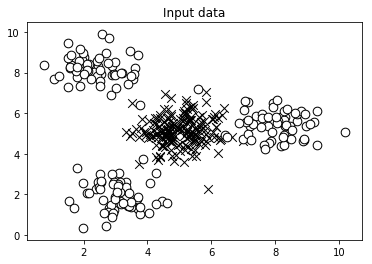

In [4]:
# Visualize input data 
plt.figure() 
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black',  
            edgecolors='black', linewidth=1, marker='x') 

plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white',  
            edgecolors='black', linewidth=1, marker='o') 

plt.title('Input data') 

We need to split the data into training and testing datasets:

Split data into training and testing datasets  

In [5]:
# Cross validation 
from sklearn.model_selection import train_test_split # Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5 )

Create, build, and visualize a decision tree classifier based on the training dataset. The random_state parameter refers to the seed used by the random number generator required for the initialization of the decision tree classification algorithm. The max_depth parameter refers to the maximum depth of the tree that we want to construct:

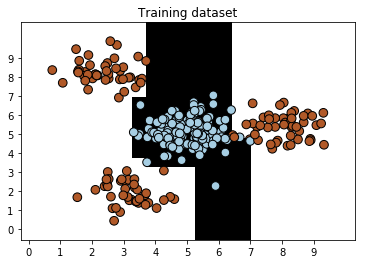

In [10]:
# Decision Trees classifier  
params = {'random_state': 1, 'max_depth': 4} 
classifier = DecisionTreeClassifier(**params) 
classifier.fit(X_train, y_train) 
visualize_classifier(classifier, X_train, y_train, 'Training dataset') 

Compute the output of the classifier on the test dataset and visualize it:

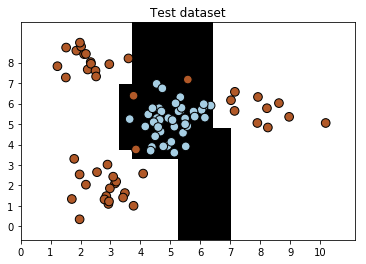

In [11]:
y_test_pred = classifier.predict(X_test) 
visualize_classifier(classifier, X_test, y_test, 'Test dataset') 

Evaluate the performance of the classifier by printing the classification report:

In [12]:
# Evaluate classifier performance 
class_names = ['Class-0', 'Class-1'] 
print("\n" + "#"*40) 
print("\nClassifier performance on training dataset\n") 
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names)) 
print("#"*40 + "\n") 
 
print("#"*40) 
print("\nClassifier performance on test dataset\n") 
print(classification_report(y_test, y_test_pred, target_names=class_names)) 
print("#"*40 + "\n") 
 
plt.show() 


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

   micro avg       1.00      1.00      1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

   micro avg       0.97      0.97      0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

########################################



The performance of a classifier is characterized by precision, recall, and f1-scores. Precision refers to the accuracy of the classification and recall refers to the number of items that were retrieved as a percentage of the overall number of items that were supposed to be retrieved. A good classifier will have high precision and high recall, but it is usually a trade-off between the two. Hence we have f1-score to characterize that. F1 score is the harmonic mean of precision and recall, which gives it a good balance between precision and recall values.